<a href="https://colab.research.google.com/github/H31muth/Challenge1-data-science-latam/blob/main/ChallengesManejoDtosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



De acuerdo al análisis de facturación la tienda 1 es la que presenta mayor facturación.

,Tiendas,Facturación Total
0,Tienda1,"1,150,880,400"
1,Tienda2,"1,116,343,500"
2,Tienda3,"1,098,019,600"
3,Tienda4,"1,038,375,700"


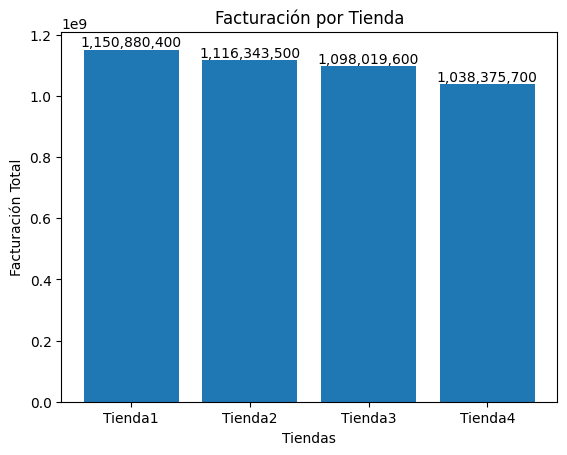

In [26]:
pd.options.display.float_format = '{:,.0f}'.format          # Aplica un formato Sin decimales y con separador de miles a los números

# Se crea diccionario donde cada clave será el nombre de cada tienda, y su valor será la suma de la columna Precio de cada Tienda
dic_tiendas = {'Tienda1': sum(tienda['Precio']), 'Tienda2': sum(tienda2['Precio']), 'Tienda3': sum(tienda3['Precio']), 'Tienda4': sum(tienda4['Precio'])}

pd.options.display.float_format = '{:,.0f}'.format          # Aplica un formato Sin decimales y con separador de miles a los números

# Se crea diccionario donde cada clave será el nombre de cada tienda, y su valor será la suma de la columna Precio de cada Tienda
dic_tiendas = {'Tienda1': sum(tienda['Precio']), 'Tienda2': sum(tienda2['Precio']), 'Tienda3': sum(tienda3['Precio']), 'Tienda4': sum(tienda4['Precio'])}

df_tiendas = pd.DataFrame.from_dict(dic_tiendas, orient='index', columns=['Facturación Total']).reset_index(names='Tiendas')  # diccionario se transforma en DF, donde las claves serán los indices del DF y los valores serán la columna llamada Facturación Total

display(df_tiendas)   # imprime con un mejor formato
print()               # salto de linea

import matplotlib.pyplot as plt                       # se importa la biblioteca para graficar
plt.bar(dic_tiendas.keys(), dic_tiendas.values())     # grafico de barras, eje x: la clave del diccionario: dic_tiendas, eje y: la sumatoria

plt.text(0, dic_tiendas['Tienda1'] + 10000000, f'{dic_tiendas["Tienda1"]:,.0f}', ha='center')   # muestra el valor de la tienda 1 en el grafico
plt.text(1, dic_tiendas['Tienda2'] + 10000000, f'{dic_tiendas["Tienda2"]:,.0f}', ha='center')
plt.text(2, dic_tiendas['Tienda3'] + 10000000, f'{dic_tiendas["Tienda3"]:,.0f}', ha='center')
plt.text(3, dic_tiendas['Tienda4'] + 10000000, f'{dic_tiendas["Tienda4"]:,.0f}', ha='center')
plt.xlabel('Tiendas')
plt.ylabel('Facturación Total')
plt.title('Facturación por Tienda')
plt.show()

# 2. Ventas por categoría

In [65]:
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4} 	# se crea diccionario tiendas con cada dataframe
graficar = {}   # Diccionario para guardar resumenes por Tienda y luego graficarlos


In [66]:
for nombre, df in tiendas.items():                                            # recorre el DF de cada tienda
  SumaxCategoria = df.groupby('Categoría del Producto')['Producto'].count()   # groupby ordena el DF por categoría y luego los cuenta
  resumen = SumaxCategoria.sort_values(ascending=False)                       # ordena las ventas de mayor a menor
  graficar[nombre] = resumen                                                  # guarda el resumen en el diccionario graficar
union_resumen=pd.DataFrame(graficar)
print(f'\n\n Cantidad de productos por categoría \n')
print(union_resumen)




 Cantidad de productos por categoría 

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


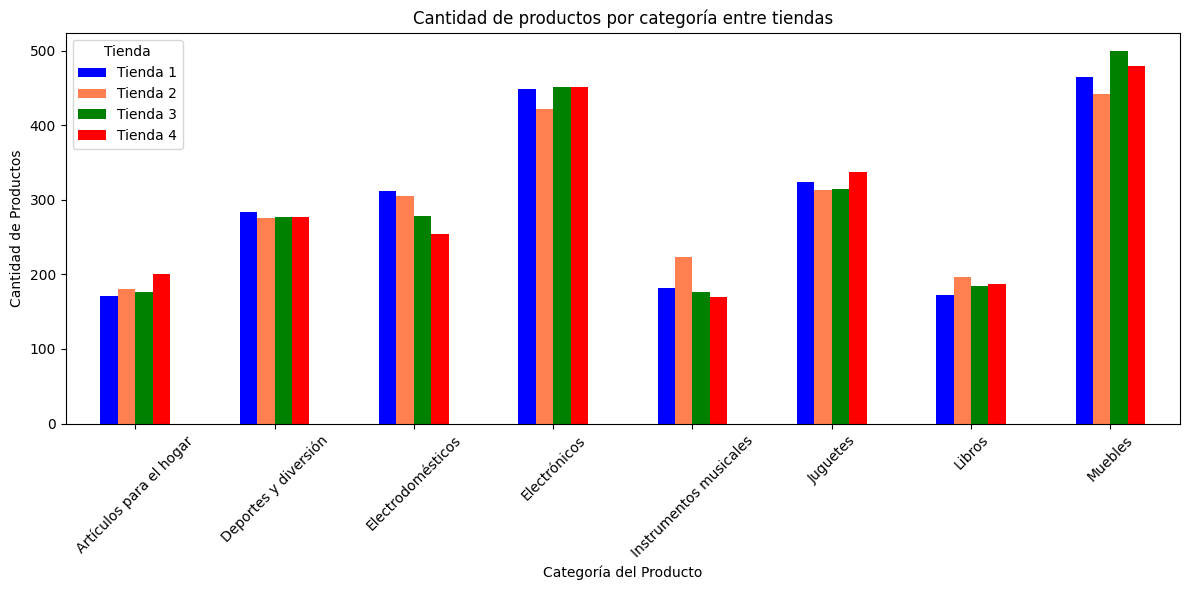

In [67]:
colores = ['blue', 'coral', 'green', 'red']      # distintos colores para diferenciar a cada tienda
union_resumen.plot(kind='bar', figsize=(12, 6), color=colores)                       # cada barra representa una tienda, agrupadas por categoría
plt.title('Cantidad de productos por categoría entre tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Productos')
plt.xticks(rotation=45)                                                # gira las etiquetas
plt.legend(title='Tienda')
plt.tight_layout()                                                     # ajusta automáticamente el espaciado
plt.show()


# 3. Calificación promedio de la tienda


In [70]:
pd.reset_option('display.float_format')   # resetear formato global para que muestre decimales

prom_calificaciones = {nombre: df['Calificación'].mean() for nombre, df in tiendas.items()}
df_prom_calificaciones = pd.DataFrame.from_dict(prom_calificaciones, orient='index')  # diccionario se pasa a data frame para mejorar presentación y orden al imprimir en pantalla
df_prom_calificaciones.columns = ['Calificación promedio']
print(df_prom_calificaciones.round(2))

          Calificación promedio
Tienda 1                   3.98
Tienda 2                   4.04
Tienda 3                   4.05
Tienda 4                   4.00


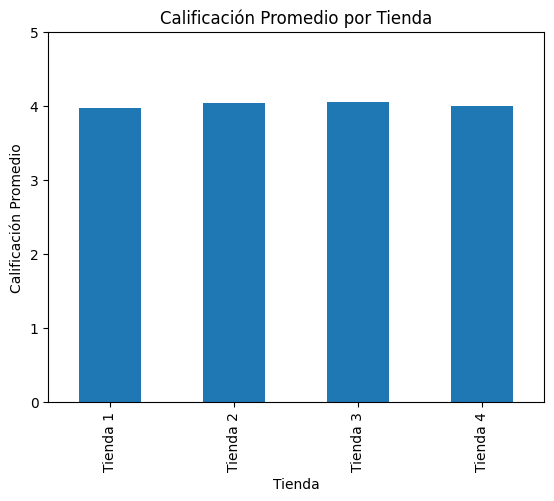

In [15]:
df_prom_calificaciones.plot(kind='bar', legend=False)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.xlabel('Tienda')
plt.ylim(0, 5)
plt.show()


# 4. Productos más y menos vendidos

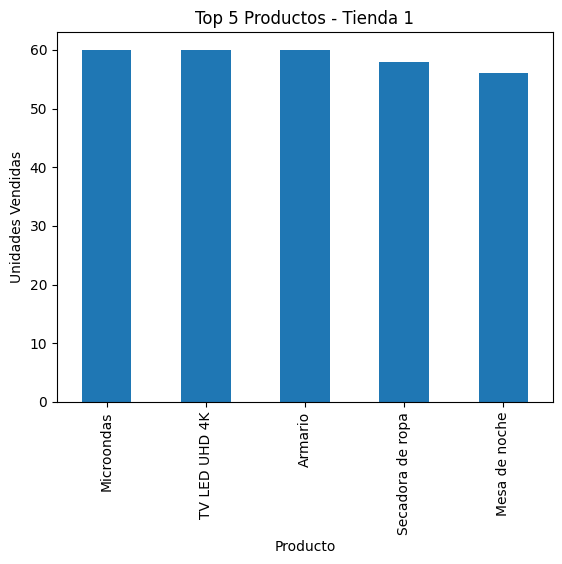

Resumen Tienda 1:
  Más vendido -> Microondas (60 unidades)
  Menos vendido -> Auriculares con micrófono (33 unidades)






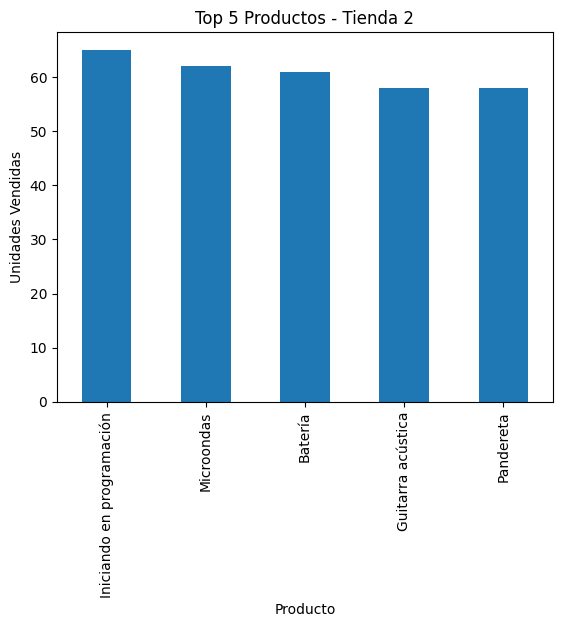

Resumen Tienda 2:
  Más vendido -> Iniciando en programación (65 unidades)
  Menos vendido -> Juego de mesa (32 unidades)






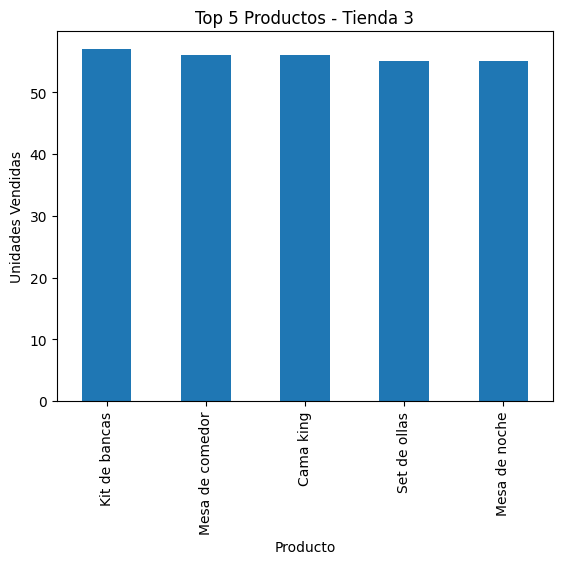

Resumen Tienda 3:
  Más vendido -> Kit de bancas (57 unidades)
  Menos vendido -> Bloques de construcción (35 unidades)






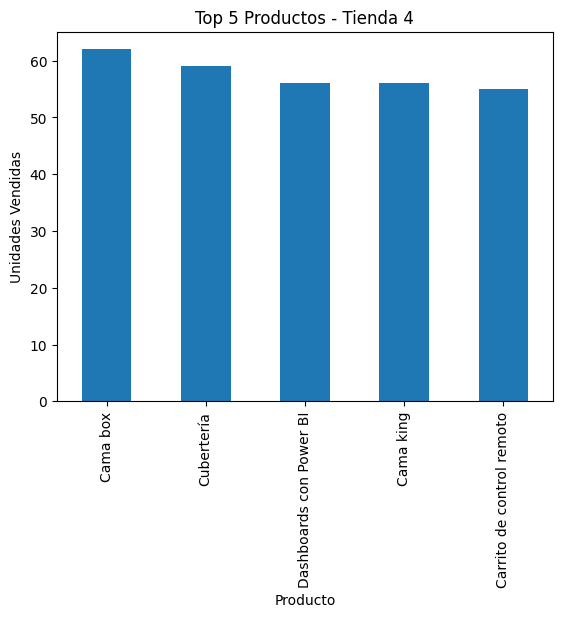

Resumen Tienda 4:
  Más vendido -> Cama box (62 unidades)
  Menos vendido -> Guitarra eléctrica (33 unidades)






In [52]:
for nombre, df in tiendas.items():			# recorre el diccionario tiendas: la tienda y su DF
  conteo = df['Producto'].value_counts()		# en la columna “producto” con la función conteo.max se suma la cantidad que aparece
  mas_vendido = conteo.idxmax(), conteo.max()	# entrega una tupla con el producto mas vendido y las veces que se repite
  menos_vendido = conteo.idxmin(), conteo.min()	# entrega una tupla con el producto menos vendido y las veces que se repite
  #print(f"\n\n\033[1m\033[4m{nombre}\033[0m:")
  #print(f"  Más vendido -> {mas_vendido[0]} ({mas_vendido[1]} unidades)")
  #print(f"  Menos vendido -> {menos_vendido[0]} ({menos_vendido[1]} unidades)")

  conteo.head(5).plot(kind='bar', title=f'Top 5 Productos - {nombre}')  # grafico de barra con los 5 productos más vendidos
  plt.ylabel('Unidades Vendidas')
  plt.xlabel('Producto')
  plt.show()

  print(f"\033[1mResumen {nombre}\033[0m:")
  print(f"  Más vendido -> {mas_vendido[0]} ({mas_vendido[1]} unidades)")
  print(f"  Menos vendido -> {menos_vendido[0]} ({menos_vendido[1]} unidades)\n\n\n\n")

# 5. Envío promedio por tienda

In [54]:
envio_prom = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}  # Comprensión de Diccionario, recorre el DF de cada Tienda y saca el promedio con la función mean()
df_envio_prom = pd.DataFrame.from_dict(envio_prom, orient='index', columns=['Costo promedio de envío'])  # el diccionario es transformado a DF para mejorar orden al imprimir en pantalla
print(df_envio_prom.round(1))


          Costo promedio de envío
Tienda 1                  26018.6
Tienda 2                  25216.2
Tienda 3                  24805.7
Tienda 4                  23459.5


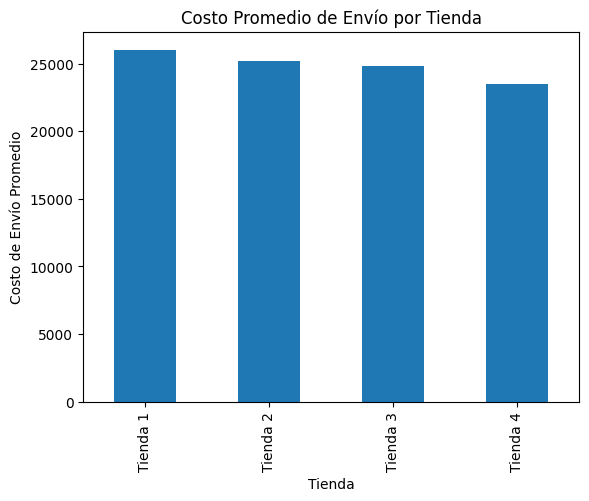

In [19]:
df_envio_prom.plot(kind='bar', legend=False)
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.xlabel('Tienda')
plt.show()

# 6. Exploración Geográfica de Ventas (Opcional)

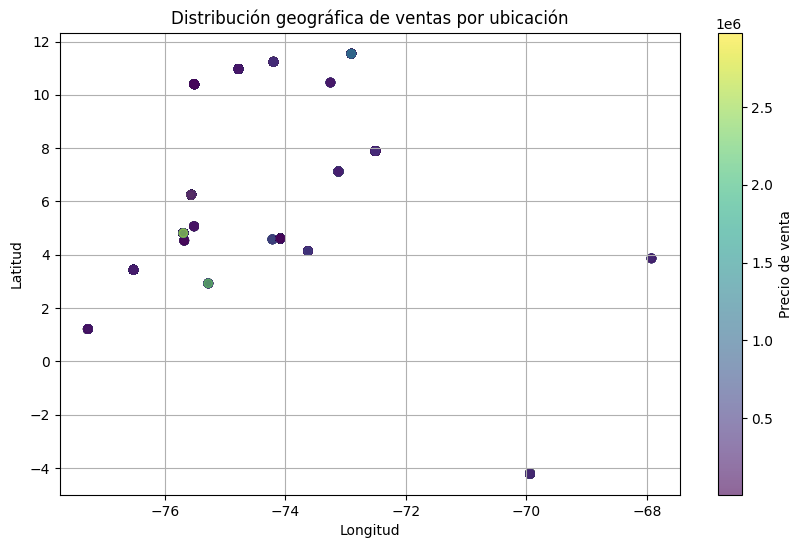

In [77]:
df_geo = pd.concat([tienda, tienda2, tienda3, tienda4])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_geo['lon'], df_geo['lat'],
    c=df_geo['Precio'], cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label='Precio de venta')
plt.title('Distribución geográfica de ventas por ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

# **Informe Final de Evaluación de Tiendas - Recomendación de Venta**

## **Introducción**
El presente informe tiene como objetivo analizar 5 variables asociadas al rendimiento de 4 tiendas, para identificar la tienda con menor desempeño, estas variable son:
1.- Ingresos totales,
2.- Categorías de productos más populares,
3.- Calificaciones promedio de los clientes,
4.- Productos más y menos vendidos,
5.- Costo de envío promedio.

## **Desarrollo**
###1. Ingresos Totales:
El primer criterio evaluado fue el ingreso total generado por cada tienda. La tienda con menores ingresos es la Tienda 4
###2.- Categorías de productos más populares
En este criterio podemos ver que las 4 tiendas tienen el mismo orden de categorías mas populares, solo que la tienda 4 vende menos
###3.- Calificaciones promedio
Reflejan el nivel de satisfacción con los productos y servicios. Si bien la tienda 4 no tiene la calificación más baja, es la segunda más baja
###4.- Productos más y menos vendidos
Este criterio no debería influir directamente en el desempeño de las tiendas
###5.- Costo de envío promedio
El mayor costo es la Tienda 1, vs la mejor: Tienda 4, hay una diferencia de $2.500, lo cual no ejerce una gran relevancia en relación a la diferencia en los ingresos totales entre ambas tiendas, donde Tienda 1 es mayor a Tienda 4 en: 112,504,700

## **Recomendación final**

Se recomienda vender la Tienda 4, dado que es la que presenta menor ingreso por venta.


